In [2]:
import numpy as np
import networkx as nx
import netgraph
import matplotlib.pylab as plt
import os
from tqdm import tqdm

os.makedirs("./Karate", exist_ok=True)

from Qommunity.samplers.hierarchical.advantage_sampler import AdvantageSampler
from Qommunity.samplers.hierarchical.gurobi_sampler import GurobiSampler
from Qommunity.samplers.regular.leiden_sampler import LeidenSampler
from Qommunity.samplers.regular.louvain_sampler import LouvainSampler
from Qommunity.samplers.regular.dqm_sampler import DQMSampler
from Qommunity.samplers.regular.bayan_sampler import BayanSampler

from iterative_searcher.iterative_searcher import IterativeSearcher

In [3]:
K = nx.karate_club_graph()
num_runs = 50
resolution = 1

In [4]:
gurobi_sampler = GurobiSampler(K, resolution=resolution)
gurobi_iterative= IterativeSearcher(gurobi_sampler)

saving_path = f"./Karate/solver-gurobi_runs-{num_runs}"
gurobi_communities, gurobi_modularities, gurobi_times_elapsed = gurobi_iterative.run(
    num_runs=num_runs, saving_path=saving_path
)

100%|██████████| 50/50 [00:05<00:00,  8.83it/s]


In [6]:
bayan_sampler = BayanSampler(K, resolution=resolution)
bayan_iterative= IterativeSearcher(bayan_sampler)

saving_path = f"./Karate/solver-bayan_runs-{num_runs}"
bayan_communities, bayan_modularities, bayan_times_elapsed = bayan_iterative.run(
    num_runs=num_runs, saving_path=saving_path
)

  0%|          | 0/50 [00:00<?, ?it/s]

Set parameter Username
Academic license - for non-commercial use only - expires 2025-03-27


100%|██████████| 50/50 [01:42<00:00,  2.05s/it]


In [33]:
adv_sampler = AdvantageSampler(K, resolution=resolution, num_reads=100, use_clique_embedding=True)
adv_iterative= IterativeSearcher(adv_sampler)

saving_path = f"./Karate/solver-adv_runs-{num_runs}"
adv_communities, adv_modularities, adv_times_elapsed = adv_iterative.run(
    num_runs=num_runs, saving_path=saving_path
)

100%|███████████████████████████████████████████| 50/50 [07:03<00:00,  8.47s/it]


In [35]:
louv_sampler = LouvainSampler(K, resolution=resolution)
louv_iterative= IterativeSearcher(louv_sampler)

saving_path = f"./Karate/solver-louv_runs-{num_runs}"
louv_communities, louv_modularities, louv_times_elapsed = louv_iterative.run(
    num_runs=num_runs, saving_path=saving_path
)

100%|██████████| 50/50 [00:00<00:00, 221.11it/s]


In [30]:
dqm_sampler = DQMSampler(K, resolution=resolution, time=5, cases=4)
dqm_iterative= IterativeSearcher(dqm_sampler)

saving_path = f"./Karate/solver-dqm_runs-{num_runs}"
dqm_communities, dqm_modularities, dqm_times_elapsed = dqm_iterative.run(
    num_runs=num_runs, saving_path=saving_path
)

100%|███████████████████████████████████████████| 50/50 [10:40<00:00, 12.81s/it]


In [5]:
leid_sampler = LeidenSampler(K)
leid_iterative= IterativeSearcher(leid_sampler)

saving_path = f"./Karate/solver-leid_runs-{num_runs}"
leid_communities, leid_modularities, leid_times_elapsed = leid_iterative.run(
    num_runs=num_runs, saving_path=saving_path
)

100%|██████████| 50/50 [00:00<00:00, 363.78it/s]


In [7]:
# We load the data for reproducibility
adv_modularities = np.load(f"./Karate/solver-adv_runs-{num_runs}.npy")
gurobi_modularities = np.load(f"./Karate/solver-gurobi_runs-{num_runs}.npy")
dqm_modularities = np.load(f"./Karate/solver-dqm_runs-{num_runs}.npy")
louv_modularities = np.load(f"./Karate/solver-louv_runs-{num_runs}.npy")
leid_modularities = np.load(f"./Karate/solver-leid_runs-{num_runs}.npy")
bayan_modularities = np.load(f"./Karate/solver-bayan_runs-{num_runs}.npy")

adv_times_elapsed = np.load(f"./Karate/solver-adv_runs-{num_runs}_times.npy")
gurobi_times_elapsed = np.load(f"./Karate/solver-gurobi_runs-{num_runs}_times.npy")
dqm_times_elapsed = np.load(f"./Karate/solver-dqm_runs-{num_runs}_times.npy")
louv_times_elapsed = np.load(f"./Karate/solver-louv_runs-{num_runs}_times.npy")
leid_times_elapsed = np.load(f"./Karate/solver-leid_runs-{num_runs}_times.npy")
bayan_times_elapsed = np.load(f"./Karate/solver-bayan_runs-{num_runs}_times.npy")

adv_comms = np.load(f"./Karate/solver-adv_runs-{num_runs}_comms.npy", allow_pickle=True)
gurobi_comms = np.load(f"./Karate/solver-gurobi_runs-{num_runs}_comms.npy", allow_pickle=True)
dqm_comms = np.load(f"./Karate/solver-dqm_runs-{num_runs}_comms.npy", allow_pickle=True)
louv_comms = np.load(f"./Karate/solver-louv_runs-{num_runs}_comms.npy", allow_pickle=True)
leid_comms = np.load(f"./Karate/solver-leid_runs-{num_runs}_comms.npy", allow_pickle=True)
bayan_comms = np.load(f"./Karate/solver-bayan_runs-{num_runs}_comms.npy", allow_pickle=True)

mod_adv, freq_adv = np.unique(adv_modularities, return_counts=True)
mod_gurobi, freq_gurobi = np.unique(gurobi_modularities, return_counts=True)
mod_dqm, freq_dqm = np.unique(dqm_modularities, return_counts=True)
mod_louv, freq_louv = np.unique(louv_modularities, return_counts=True)
mod_leid, freq_leid = np.unique(leid_modularities, return_counts=True)
mod_bayan, freq_bayan = np.unique(bayan_modularities, return_counts=True)

c_adv = len(adv_comms[np.argmax(adv_modularities)])
c_gurobi = len(gurobi_comms[np.argmax(gurobi_modularities)])
c_dqm = len(dqm_comms[np.argmax(dqm_modularities)])
c_louv = len(louv_comms[np.argmax(louv_modularities)])
c_leid = len(leid_comms[np.argmax(leid_modularities)])
c_bayan = len(bayan_comms[np.argmax(bayan_modularities)])

In [8]:
print("Algorithm \t Max Q \t N communities \t Frequency \t Time (s)")
print("---------------------------------------------------------")
print(f"Annealing \t {round(mod_adv[-1],6)} \t {c_adv} \t {100*freq_adv[-1]/num_runs} %  \t {adv_times_elapsed.mean()} +- {adv_times_elapsed.std()/np.sqrt(num_runs)}")
print(f"Gurobi \t {round(mod_gurobi[-1],6)} \t {c_gurobi} \t {100*freq_gurobi[-1]/num_runs} %  \t {gurobi_times_elapsed.mean()} +- {gurobi_times_elapsed.std()/np.sqrt(num_runs)}")
print(f"DQM       \t {round(mod_dqm[-1],6)} \t {c_dqm} \t {100*freq_dqm[-1]/num_runs} %  \t {dqm_times_elapsed.mean()} +- {dqm_times_elapsed.std()/np.sqrt(num_runs)}")
print(f"Louvain   \t {round(mod_louv[-1],6)} \t {c_louv} \t {100*freq_louv[-1]/num_runs} % \t {louv_times_elapsed.mean()} +- {louv_times_elapsed.std()/np.sqrt(num_runs)}")
print(f"Leiden    \t {round(mod_leid[-1],6)} \t {c_leid} \t {100*freq_leid[-1]/num_runs} % \t {leid_times_elapsed.mean()} +- {leid_times_elapsed.std()/np.sqrt(num_runs)}")
print(f"Bayan    \t {round(mod_bayan[-1],6)} \t {c_bayan} \t {100*freq_bayan[-1]/num_runs} % \t {bayan_times_elapsed.mean()} +- {bayan_times_elapsed.std()/np.sqrt(num_runs)}")

Algorithm 	 Max Q 	 N communities 	 Frequency 	 Time (s)
---------------------------------------------------------
Annealing 	 0.444904 	 4 	 100.0 %  	 8.46568461894989 +- 0.2571043145026076
Gurobi 	 0.444904 	 4 	 100.0 %  	 0.11049344062805176 +- 0.002040895382687678
DQM       	 0.444904 	 4 	 100.0 %  	 12.808557538986205 +- 0.03540523012881962
Louvain   	 0.444904 	 4 	 40.0 % 	 0.0037561511993408204 +- 0.0004049010300129798
Leiden    	 0.444904 	 4 	 100.0 % 	 0.0019035482406616212 +- 5.835346869877643e-05
Bayan    	 0.444904 	 4 	 100.0 % 	 2.043358869552612 +- 0.059123569948242555


## We can interpret the whole hierarchical process to gain insights into the hidden structure of the network: DENDROGRAMS

In [9]:
import networkx as nx
import numpy as np
import matplotlib.pylab as plt

from Qommunity.samplers.hierarchical.advantage_sampler import AdvantageSampler
from Qommunity.searchers.hierarchical_community_searcher import HierarchicalCommunitySearcher
from iterative_searcher.iterative_searcher import IterativeSearcher
from dendro import Dendrogram

num_runs = 50
resolution = 1

G = nx.karate_club_graph()

searcher = IterativeSearcher(AdvantageSampler(G))
results = searcher.run_with_sampleset_info(num_runs=num_runs, save_results=False, saving_path=None, iterative_verbosity=0)

# results ---> ("communities", object), ("modularity", np.float_), ("time", np.float_), ("division_tree", object), ("division_modularities", object),
communities, modularity, time, dvision_tree, division_modularities = None, 0, None, None, None
for res in results:
    if res[1]>modularity:
        communities = res[0]
        modularity = res[1]
        times = res[2]
        division_tree = res[3]
        division_modularities = res[4]

100%|██████████████████████████████████████████████████████████████████████████████████████████████| 50/50 [09:21<00:00, 11.24s/it]


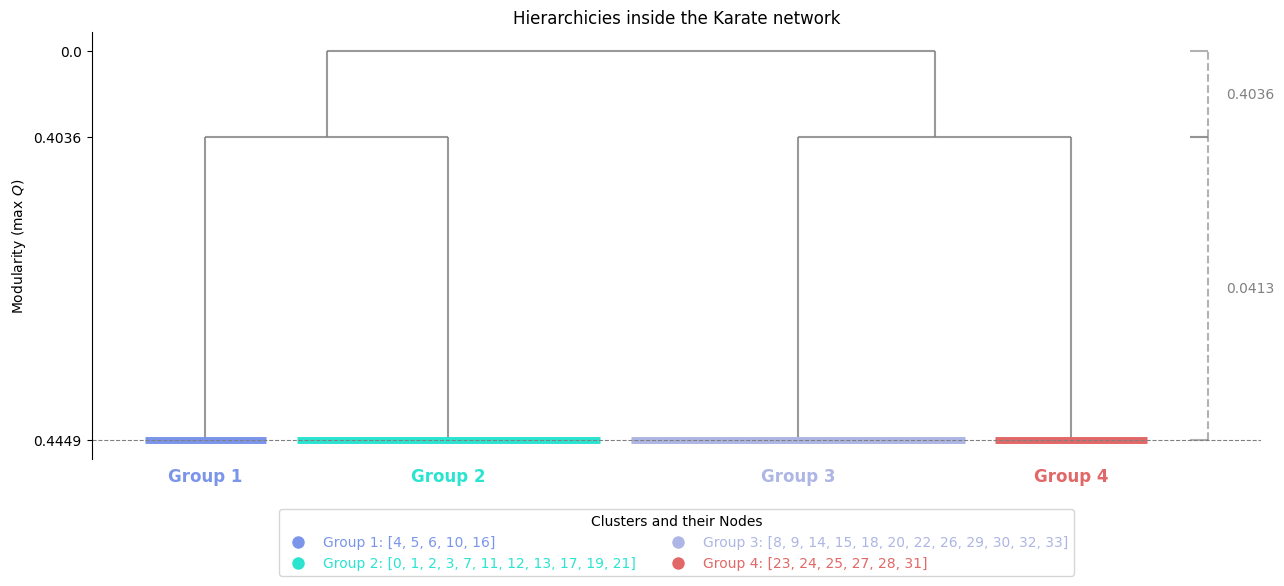

In [16]:
dendro = Dendrogram(G, communities, division_modularities, division_tree)
fig, ax = plt.subplots(1,1,figsize=(13,6))

dendro.draw(
    display_leafs=False,
    yaxis_abs_log=True,
    ax=ax,
    fig=fig,
    communities_labels=["Group 1", "Group 2", "Group 3", "Group 4", "Group 5", "Group 6", "Group 7", "Group 8"],
    fig_saving_path="./Karate/dendrogram.svg",
    title='Hierarchicies inside the Karate network'
)
